In [42]:
import pandas as pd
%matplotlib inline
import seaborn as sb

In [2]:
attrs_df = pd.read_csv('attributes.csv').dropna()
attrs_df['product_uid'] = attrs_df['product_uid'].astype(int)

prod_df = pd.read_csv('product_descriptions.csv', encoding='ISO-8859-1', index_col='product_uid')
prod_df['product_description'] = prod_df.product_description.str.encode('utf-8')

tr_df = pd.read_csv('train.csv', encoding='ISO-8859-1', index_col='id')
tr_df['search_term'] = tr_df.search_term.str.encode('utf-8')
tr_df['product_title'] = tr_df.product_title.str.encode('utf-8')

train_df = tr_df.merge(prod_df, left_on='product_uid', right_index=True, how='inner')

In [4]:
tr_df.relevance.value_counts()

3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

In [7]:
attrs_df[:5]

,product_uid,name,value
0,100001,Bullet01,Versatile connector for various 90° connection...
1,100001,Bullet02,Stronger than angled nailing or screw fastenin...
2,100001,Bullet03,Help ensure joints are consistently straight a...
3,100001,Bullet04,Dimensions: 3 in. x 3 in. x 1-1/2 in.
4,100001,Bullet05,Made from 12-Gauge steel


In [9]:
attrs_df.name.nunique()

5410

In [44]:
attrs_df.name.value_counts()[:10]

MFG Brand Name          86250
Bullet02                86248
Bullet03                86226
Bullet04                86174
Bullet01                85940
Product Width (in.)     61137
Bullet05                60529
Product Height (in.)    54698
Product Depth (in.)     53652
Product Weight (lb.)    45175
Name: name, dtype: int64

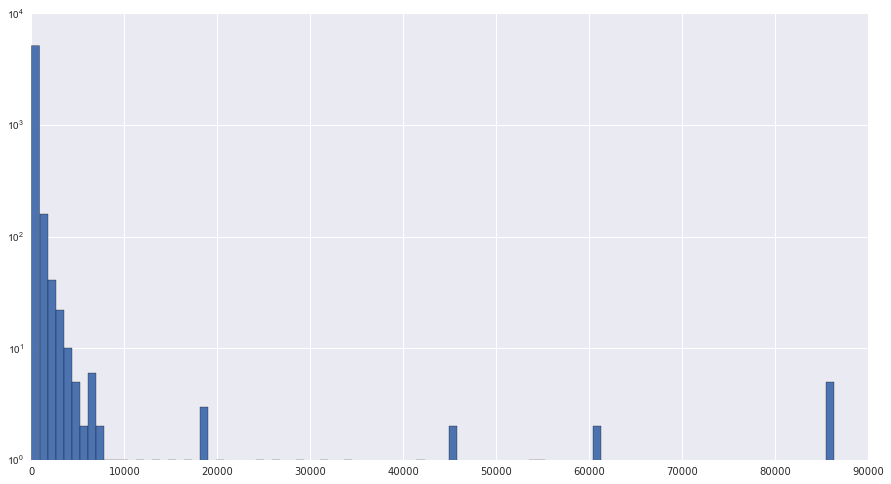

In [36]:
attrs_df.name.value_counts().hist(bins=100, log=True, figsize=(15, 8))

In [6]:
prod_df[:5]

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [14]:
prod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124428 entries, 0 to 124427
Data columns (total 2 columns):
product_uid            124428 non-null int64
product_description    124428 non-null object
dtypes: int64(1), object(1)
memory usage: 2.8+ MB


In [5]:
tr_df[:5]

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [15]:
tr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74067 entries, 0 to 74066
Data columns (total 5 columns):
id               74067 non-null int64
product_uid      74067 non-null int64
product_title    74067 non-null object
search_term      74067 non-null object
relevance        74067 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


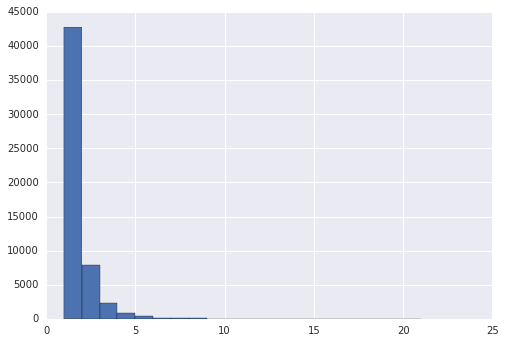

In [41]:
tr_df.groupby('product_uid').search_term.count().hist(bins=20)

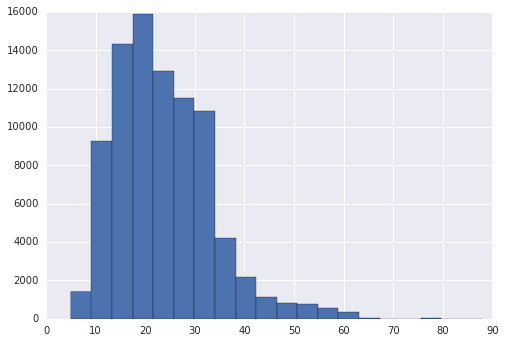

In [53]:
attrs_df.groupby('product_uid')['name'].count().hist(bins=20)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
title_vec = CountVectorizer(binary=True)

title_vec.fit(train_df.product_title)

q_v = title_vec.transform(train_df.search_term)

t_v = title_vec.transform(train_df.product_title)

pd.Series(q_v.multiply(t_v).sum(axis=1).A1).value_counts()

2    25989
1    22639
0    10963
3    10524
4     2861
5      775
6      229
7       49
8       32
9        6
dtype: int64

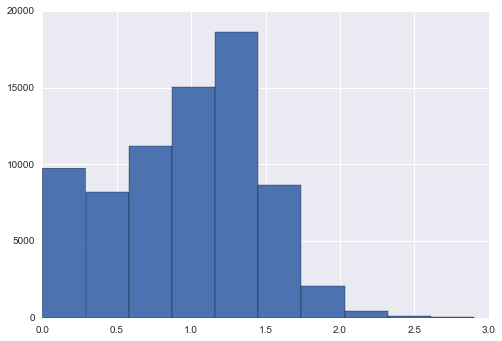

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
title_tfidf = TfidfVectorizer(analyzer=tokenizer.tokenize).fit(train_df.product_title)

q_v = title_tfidf.transform(train_df.search_term)

t_v = (title_tfidf.transform(train_df.product_title) > 0).astype(int)

pd.Series(q_v.multiply(t_v).sum(axis=1).A1).hist()